### Support Vector machine

In [32]:
# Linear SVM
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn import datasets
sns.set_style('whitegrid')
%matplotlib inline


In [33]:
ds = sns.load_dataset('iris')
ds.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [34]:
cols = [ 'petal_length', 'petal_width','species']
ds.loc[:  , cols].head(2)

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa


In [35]:
ds.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [36]:
col = ['petal_length', 'petal_width']
X = ds.loc[:, col]


In [37]:
species_to_num  = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
ds['tmp'] = ds['species'].map(species_to_num)
y = ds['tmp']

In [38]:
C  = 0.001
svm_ = SVC(kernel='linear', C=C)
# svm_ = svm.LinearSVC(C=C , loss='hinge')
# svm_ = svm.SVC(kernal = 'poly',degree = 3, C=C)
# svm_ = svm.SVC(kernal = 'rbf',gamma = 0.7, C=C)
svm_.fit(X, y)

SVC(C=0.001, kernel='linear')

In [39]:
svm_.predict([[6,2]])

array([2], dtype=int64)

In [40]:
Xv = X.values.reshape(-1,1)
h=0.02
x_min, x_max = Xv[:, 0].min() - 1, Xv[:, 0].max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

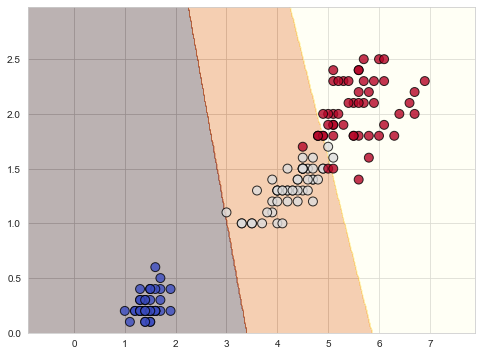

In [41]:
z = svm_.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80 ,cmap=plt.cm.coolwarm,alpha=0.8,edgecolors='k')

In [44]:
# now to with the train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ds = sns.load_dataset('iris')
col = ['petal_length', 'petal_width']
X = ds.loc[:, col]
y

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [47]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)


In [48]:
C= 0.01
svm_ = SVC(kernel='linear', C=C)
svm_.fit(X_standardized, y_train)


SVC(C=0.01, kernel='linear')

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [55]:
res  = cross_val_score(svm_, X_standardized, y_train, cv=3,scoring='accuracy')
print('Avarege accuracy: ', np.mean(res))
print('Standard deviation: ', np.std(res))

Avarege accuracy:  0.5666666666666667
Standard deviation:  0.18856180831641264


In [56]:
y_train_pred = cross_val_predict(svm_, X_standardized, y_train, cv=3)

In [57]:
consfu = confusion_matrix(y_train, y_train_pred)

In [59]:
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print(classification_report(y_train, y_train_pred))

[[ 6  4  0]
 [ 0 11  0]
 [ 0  9  0]]


              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.46      1.00      0.63        11
           2       0.00      0.00      0.00         9

    accuracy                           0.57        30
   macro avg       0.49      0.53      0.46        30
weighted avg       0.50      0.57      0.48        30



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
# Cross validation with test set
y_pred = cross_val_predict(svm_, X_test_standardized, y_test, cv=3)

In [61]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[40  0  0]
 [ 5  0 34]
 [ 0  0 41]]


              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       0.00      0.00      0.00        39
           2       0.55      1.00      0.71        41

    accuracy                           0.68       120
   macro avg       0.48      0.67      0.55       120
weighted avg       0.48      0.68      0.56       120



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Polynomial SVM

In [63]:
C = 1.0
svm_poly = SVC(kernel='poly',degree=3, C=C,gamma='auto')
svm_poly.fit(X, y)

SVC(gamma='auto', kernel='poly')

In [64]:
Xv = X.values.reshape(-1,1)
h=0.02
x_min, x_max = Xv[:, 0].min() - 1, Xv[:, 0].max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


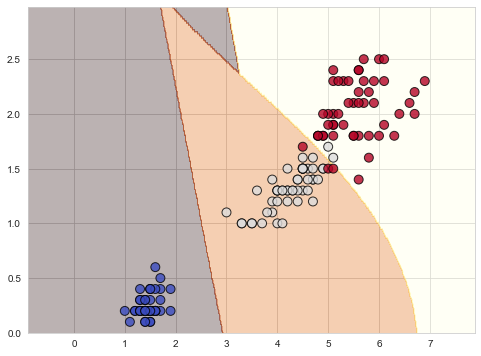

In [65]:
z  = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80 ,cmap=plt.cm.coolwarm,alpha=0.8,edgecolors='k')


Polynomail SVM implemetaion

In [67]:
ds = sns.load_dataset('iris')
col = ['petal_length', 'petal_width']
X = ds.loc[:, col]


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [69]:
clf = SVC(kernel='poly',degree=3, C=C,gamma='auto')
clf.fit(X_standardized, y_train)

SVC(gamma='auto', kernel='poly')

In [70]:
# Cross validation with train set
train_y_score = cross_val_score(clf, X_standardized, y_train, cv=3, scoring='accuracy')
print('Avarege accuracy: ', np.mean(train_y_score))
print('Standard deviation: ', np.std(train_y_score))


Avarege accuracy:  0.9333333333333332
Standard deviation:  0.09428090415820632


In [71]:
y_train_pred = cross_val_predict(clf, X_standardized, y_train, cv=3)

In [72]:
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print(classification_report(y_train, y_train_pred))

[[10  0  0]
 [ 0 11  0]
 [ 0  2  7]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.85      1.00      0.92        11
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

